In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

In [57]:
errors = np.random.normal(0, 1, 400)

In [58]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [59]:
len(date_index),len(errors)

(123, 400)

In [60]:
errors[1-2]

0.9198476208260596

In [61]:
errors[399]

0.9198476208260596

In [62]:
#creating time series 
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [63]:
#making time series 
series1 = pd.Series(date_index,series)
series1.index

Float64Index([ 49.98774724566567, 51.641181135033456, 50.210359861130996,
               49.90683670406045,  49.73293785357584,  50.31578038503913,
               50.90254025685419,  51.16000921009386, 52.188069741674376,
               51.07175112386069,
              ...
               48.85798867667304,  49.39150862283989,  48.72571556742586,
               49.53119087901385, 51.248186703637835, 50.003456464653404,
               51.75184718767283,  51.92008281234094,  49.38206120015908,
               48.98550075249022],
             dtype='float64', length=123)

In [64]:
#making time series 
series = pd.Series(series,date_index)
series.index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=123, freq='D')

In [65]:
series = series.asfreq(pd.infer_freq(series.index))
series

2019-09-01    49.987747
2019-09-02    51.641181
2019-09-03    50.210360
2019-09-04    49.906837
2019-09-05    49.732938
                ...    
2019-12-28    50.003456
2019-12-29    51.751847
2019-12-30    51.920083
2019-12-31    49.382061
2020-01-01    48.985501
Freq: D, Length: 123, dtype: float64

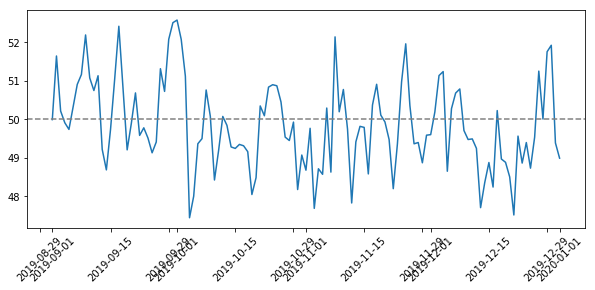

In [66]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.show()

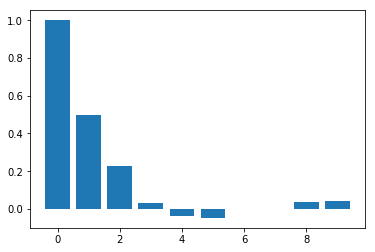

In [67]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])#lag two is significant
plt.show()

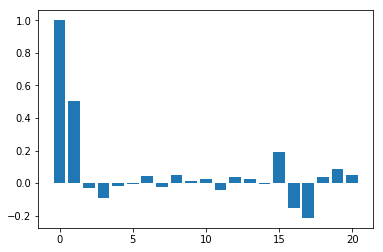

In [68]:
pacf_vals = pacf(series)
num_lags = 21
plt.bar(range(num_lags), pacf_vals[:num_lags])
plt.show()#Pacf has this characteristic pattern of alternating and diminishing over time so we see that this is a moving average pattern

In [69]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [70]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [71]:
#fit the model
model_fit = model.fit()

In [72]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -170.016
Date:                Sun, 24 Jul 2022   AIC                            348.031
Time:                        00:50:57   BIC                            359.214
Sample:                    09-01-2019   HQIC                           352.573
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8748      0.162    307.270      0.000      49.557      50.193
ma.L1          0.4943      0.102      4.829      0.000       0.294       0.695
ma.L2          0.2694      0.109      2.469      0.0

In [73]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [74]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [75]:
predictions

2019-12-31    51.018265
2020-01-01    50.235254
Freq: D, Name: predicted_mean, dtype: float64

In [76]:
residuals = test_data - predictions

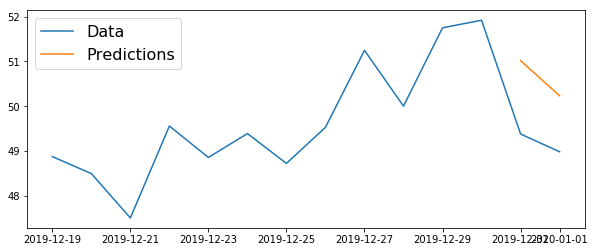

In [77]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [78]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0293


In [79]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 1.4558583069874047


In [95]:
50.0889+0.4943*-0.5386155606999949+0.2694*-0.37037956069999467+0.9701

50.69298207469342

In [84]:
train_data[-10:]

2019-12-21    47.509071
2019-12-22    49.558999
2019-12-23    48.857989
2019-12-24    49.391509
2019-12-25    48.725716
2019-12-26    49.531191
2019-12-27    51.248187
2019-12-28    50.003456
2019-12-29    51.751847
2019-12-30    51.920083
Freq: D, dtype: float64

In [83]:
train_data[-1:]

2019-12-30    51.920083
Freq: D, dtype: float64

In [93]:
51.3814674393-51.920083

-0.5386155606999949

In [94]:
51.3814674393-51.751847

-0.37037956069999467